Importando as bibliotecas

In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

import pickle


import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('Coracao.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [ ]:
for i in df.columns:
  if df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
    print(f'\nTipo da coluna:\n {df[i].dtypes}')  
    print(f'\nValores unicos:\n {df[i].unique()}')
    print(f'\nQuantidades de unicos:\n {df[i].nunique()}')
    print(f'\nAnalisando a correlação: {df[i].corr()}')
    print(f'\nQuantidades de valores nulos:\n {df[i].isnull().sum()}')
    print(f'\nAnalisando a media:\n {df[i].describe()}')
    print(f'\nQuantidades por opcao:\n {df[i].value_counts().sort_index()}')
    fig = px.box(df[i],template='plotly_dark')
    fig.show()
  else:
    print(f'Tipo da coluna:\n {df[i].dtypes}')
    print(f'Valores unicos:\n {df[i].unique()}')
    print(f'\nQuantidades de unicos:\n {df[i].nunique()}')
    print(f'\nQuantidades de valores nulos:\n {df[i].isnull().sum()}')
    print(f'\nAnalisando a media:\n {df[i].describe()}')
    print(f'\nQuantidades por opcao:\n {df[i].value_counts().sort_index()}')
    fig1 = px.bar(df,x=df[i],template='plotly_dark')
    fig1.show()  

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [ ]:
previsores = df.iloc[:,0:11].values
previsores

array([[40, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       [49, 'F', 'NAP', ..., 'N', 1.0, 'Flat'],
       [37, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       ...,
       [57, 'M', 'ASY', ..., 'Y', 1.2, 'Flat'],
       [57, 'F', 'ATA', ..., 'N', 0.0, 'Flat'],
       [38, 'M', 'NAP', ..., 'N', 0.0, 'Up']], dtype=object)

In [ ]:
previsores[:,1] = LabelEncoder().fit_transform(previsores[:,1])
previsores[:,2] = LabelEncoder().fit_transform(previsores[:,2])
previsores[:,6] = LabelEncoder().fit_transform(previsores[:,6])
previsores[:,8] = LabelEncoder().fit_transform(previsores[:,8])
previsores[:,10] = LabelEncoder().fit_transform(previsores[:,10])
previsores

array([[40, 1, 1, ..., 0, 0.0, 2],
       [49, 0, 2, ..., 0, 1.0, 1],
       [37, 1, 1, ..., 0, 0.0, 2],
       ...,
       [57, 1, 0, ..., 1, 1.2, 1],
       [57, 0, 1, ..., 0, 0.0, 1],
       [38, 1, 2, ..., 0, 0.0, 2]], dtype=object)

In [ ]:
previsores1 = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(),[1,2,6,8,10])],remainder='passthrough').fit_transform(previsores)
previsores1.shape

(918, 20)

In [ ]:
previsores1_esc = StandardScaler().fit_transform(previsores1)
previsores1_escdf = pd.DataFrame(previsores1_esc)
previsores1_escdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.515952,0.515952,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674,-1.433140,0.414855,0.832653,-0.551341,1.382928,-0.832432
1,1.938163,-1.938163,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056,-0.478484,1.527194,-1.212798,-0.551341,0.754157,0.105664
2,-0.515952,0.515952,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,-1.228087,2.038947,0.823556,-0.823556,-0.271448,-1.002181,1.150674,-1.751359,-0.141314,0.720060,-0.551341,-1.525138,-0.832432
3,1.938163,-1.938163,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-1.214246,1.214246,-0.271448,0.997824,-0.869056,-0.584556,0.303621,-0.574767,-0.551341,-1.132156,0.574711
4,-0.515952,0.515952,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674,0.051881,0.971025,-0.931314,-0.551341,-0.581981,-0.832432


In [ ]:
previsores1_escdf.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,918.000000,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02
mean,-7.740117e-18,7.740117e-18,-1.548023e-16,-9.288140e-17,6.192094e-17,7.740117e-18,1.238419e-16,9.288140e-17,0.000000,7.740117e-17,-7.740117e-18,-7.740117e-18,4.644070e-17,-6.192094e-17,-1.238419e-16,-3.483053e-17,-2.058678e-14,5.418082e-17,5.108477e-16,-1.548023e-16
std,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00
min,-5.159524e-01,-1.938163e+00,-1.084138e+00,-4.818867e-01,-5.328378e-01,-2.296787e-01,-5.074783e-01,-1.228087e+00,-0.490449,-1.214246e+00,-8.235563e-01,-2.714484e-01,-1.002181e+00,-8.690559e-01,-2.706015e+00,-2.922162e+00,-2.995530e+00,-5.513413e-01,-3.018469e+00,-3.271482e+00
25%,-5.159524e-01,5.159524e-01,-1.084138e+00,-4.818867e-01,-5.328378e-01,-2.296787e-01,-5.074783e-01,-1.228087e+00,-0.490449,-1.214246e+00,-8.235563e-01,-2.714484e-01,-1.002181e+00,-8.690559e-01,-6.906294e-01,-6.974838e-01,-5.747672e-01,-5.513413e-01,-6.605778e-01,-8.324324e-01
50%,-5.159524e-01,5.159524e-01,9.223917e-01,-4.818867e-01,-5.328378e-01,-2.296787e-01,-5.074783e-01,8.142748e-01,-0.490449,8.235563e-01,-8.235563e-01,-2.714484e-01,9.978237e-01,-8.690559e-01,5.188098e-02,-1.413143e-01,-5.396645e-04,-5.513413e-01,4.678968e-02,-2.695748e-01
75%,-5.159524e-01,5.159524e-01,9.223917e-01,-4.818867e-01,-5.328378e-01,-2.296787e-01,-5.074783e-01,8.142748e-01,-0.490449,8.235563e-01,1.214246e+00,-2.714484e-01,9.978237e-01,1.150674e+00,6.883185e-01,4.148552e-01,4.198099e-01,-5.513413e-01,7.541571e-01,5.747115e-01
max,1.938163e+00,5.159524e-01,9.223917e-01,2.075177e+00,1.876744e+00,4.353909e+00,1.970528e+00,8.142748e-01,2.038947,8.235563e-01,1.214246e+00,3.683942e+00,9.978237e-01,1.150674e+00,2.491558e+00,3.751872e+00,6.725053e+00,1.813758e+00,2.561874e+00,4.983762e+00


In [ ]:
alvo = df.iloc[:,11]

In [ ]:
lda = LinearDiscriminantAnalysis(n_components = 1)

In [ ]:
previsores_lda = lda.fit_transform(previsores1,alvo)
previsores_lda

array([[-2.01691598e+00],
       [-9.10848586e-01],
       [-1.71881862e+00],
       [ 8.38721865e-01],
       [-1.64922538e+00],
       [-1.80954079e+00],
       [-2.76421587e+00],
       [-1.86205800e+00],
       [ 1.37237620e+00],
       [-2.46978684e+00],
       [-2.61043961e+00],
       [ 6.99005542e-01],
       [-2.02122532e+00],
       [ 1.38975962e+00],
       [-2.51516396e+00],
       [-7.79873716e-01],
       [ 4.40346416e-01],
       [-2.80762116e+00],
       [ 1.06029203e+00],
       [ 3.99120978e-03],
       [-2.38999614e+00],
       [-3.03772423e-01],
       [-2.74673305e+00],
       [ 6.60481808e-01],
       [-1.82292427e+00],
       [-2.03401755e+00],
       [ 1.95737626e+00],
       [-1.68612330e+00],
       [-2.22081930e+00],
       [-1.92782443e+00],
       [ 2.19121179e-01],
       [-1.63242588e+00],
       [ 1.16302671e+00],
       [ 9.69209747e-01],
       [-2.78063758e+00],
       [-2.06609100e+00],
       [ 2.57222434e+00],
       [-2.64243482e+00],
       [-2.0

In [ ]:
lda.explained_variance_ratio_

array([1.])

Preparando base de treino e de teste

In [ ]:
x_treino, x_teste, y_treino,y_teste = train_test_split(previsores,alvo,test_size=0.30,random_state=0)

In [ ]:
x_treino.shape

(642, 11)

In [ ]:
x_teste.shape

(276, 11)

In [ ]:
y_treino.shape

(642,)

In [ ]:

y_teste.shape

(276,)

     Função dos Modelos de Sklearn
     

In [ ]:
models = {
    'naive': GaussianNB(),
    'svc': SVC(kernel='rbf', random_state=1, C=2),
    'Logistica' : LogisticRegression(random_state=1, max_iter=600,penalty='l2',tol=0.0001,C=1,solver='lbfgs'),
    'knn': KNeighborsClassifier(n_neighbors=7, metric='minkowski',p=5,),
    'Arvore': DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=3),
    'random': RandomForestClassifier(n_estimators=100,criterion='gini',random_state=0,max_depth=3),
    'xgboost': XGBClassifier(max_depth=2,learning_rate=0.05,n_estimators=250,objective='reg:logistic',random_state=5)
    
    }


def treino_teste(models, x_teste, y_teste, x_treino, y_treino):
    modelos_score = {}

    for nome, model in models.items():
          
            model.fit(x_treino, y_treino)
            
            resultado = model.score(x_teste, y_teste) * 100

            # Corrigindo o formato da string
            resultado1 = '{:.2f}%'.format(resultado)

            modelos_score[nome] = resultado1

            md = pd.DataFrame(modelos_score,index=['Acurácia'])

    return md    

treino_teste(models=models,x_teste=x_teste,y_teste=y_teste,x_treino=x_treino,y_treino=y_treino)


,naive,svc,Logistica,knn,Arvore,random,xgboost
Acurácia,82.97%,67.03%,84.06%,67.39%,81.88%,82.97%,84.06%


Função para rodar os modelos

In [ ]:
def predição(modelo,dados,dados1):
    previsor = modelo.predict(dados)
    print('\n Acurácia: %.2f%%'%(accuracy_score(dados1,previsor)*100))
    sns.set(font_scale=1.0)
    plt.subplots(figsize=(2,2))
    plt.title('Matriz de confusão')
    ax = sns.heatmap(confusion_matrix(dados1,previsor),annot=True,cbar=False)
    plt.xlabel('Rótolos verdadeiros')
    plt.ylabel('Rótulos previstos')
    print(f'\nClassificação: \n{classification_report(dados1,previsor)}')
    


Função para Validação cruzada

In [ ]:
def validacao_cruzada(modelo,base):
    kf = KFold(n_splits=30,shuffle=True,random_state=5)

    mod = modelo

    resul = cross_val_score(mod,base,alvo,cv=kf)

    print('Acurácia Média: %.2f%%'%(resul.mean()*100.0))

Analisando o modelo de teste Naive bayes


 Acurácia: 82.97%

Classificação: 
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       113
           1       0.87      0.84      0.85       163

    accuracy                           0.83       276
   macro avg       0.82      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



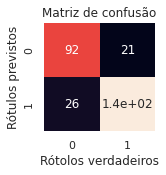

In [ ]:
predição(modelo=models['naive'],dados=x_teste,dados1=y_teste)  

Analisando o modelo de treino naive bayes 


 Acurácia: 84.58%

Classificação: 
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       297
           1       0.86      0.85      0.86       345

    accuracy                           0.85       642
   macro avg       0.84      0.85      0.85       642
weighted avg       0.85      0.85      0.85       642



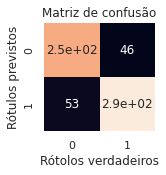

In [ ]:
predição(modelo=models['naive'],dados=x_treino,dados1=y_treino)

Validação cruzada Naive Bayes

In [ ]:
validacao_cruzada(modelo=models['naive'],base=previsores1_esc)

Acurácia Média: 85.05%



Analisando o modelo de treino SVC


 Acurácia: 67.03%

Classificação: 
              precision    recall  f1-score   support

           0       0.59      0.61      0.60       113
           1       0.72      0.71      0.72       163

    accuracy                           0.67       276
   macro avg       0.66      0.66      0.66       276
weighted avg       0.67      0.67      0.67       276



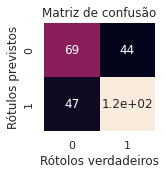

In [ ]:
predição(modelo=models['svc'],dados=x_teste,dados1=y_teste)

Analisando o modelo de treino SVC


 Acurácia: 72.12%

Classificação: 
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       297
           1       0.73      0.76      0.75       345

    accuracy                           0.72       642
   macro avg       0.72      0.72      0.72       642
weighted avg       0.72      0.72      0.72       642



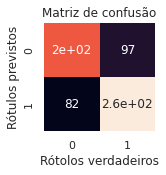

In [ ]:
predição(modelo=models['svc'],dados=x_treino,dados1=y_treino)

Validação cruzada SVC

In [ ]:
validacao_cruzada(modelo=models['svc'],base=previsores1_esc)

Acurácia Média: 86.04%


Analisando o modelo de teste LogisticRegression


 Acurácia: 84.06%

Classificação: 
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       113
           1       0.86      0.87      0.87       163

    accuracy                           0.84       276
   macro avg       0.84      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



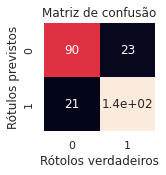

In [ ]:
predição(modelo=models['Logistica'],dados=x_teste,dados1=y_teste)  

Analisando o modelo de treino LogisticRegression


 Acurácia: 85.05%

Classificação: 
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       297
           1       0.87      0.86      0.86       345

    accuracy                           0.85       642
   macro avg       0.85      0.85      0.85       642
weighted avg       0.85      0.85      0.85       642



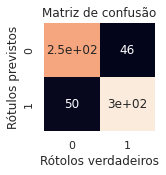

In [ ]:
predição(modelo=models['Logistica'],dados=x_treino,dados1=y_treino)

Analisando validação cruzada

In [ ]:
validacao_cruzada(modelo=models['Logistica'],base=previsores1_esc)

Acurácia Média: 85.82%


Analisando o modelo de teste KNN 


 Acurácia: 67.39%

Classificação: 
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       113
           1       0.73      0.71      0.72       163

    accuracy                           0.67       276
   macro avg       0.66      0.67      0.66       276
weighted avg       0.68      0.67      0.67       276



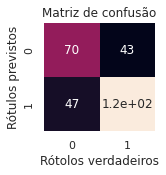

In [ ]:
predição(modelo=models['knn'],dados=x_teste,dados1=y_teste)  

Analisando o modelo de treino KNN


 Acurácia: 76.95%

Classificação: 
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       297
           1       0.77      0.82      0.79       345

    accuracy                           0.77       642
   macro avg       0.77      0.77      0.77       642
weighted avg       0.77      0.77      0.77       642



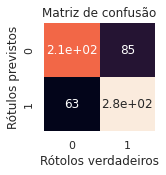

In [ ]:
predição(modelo=models['knn'],dados=x_treino,dados1=y_treino)

Analisando Validação Cruzada

In [ ]:
validacao_cruzada(modelo=models['Logistica'],base=previsores1_esc)

Acurácia Média: 85.82%


Analisando o modelo teste com Arvore de decisão


 Acurácia: 81.88%

Classificação: 
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       113
           1       0.85      0.84      0.85       163

    accuracy                           0.82       276
   macro avg       0.81      0.81      0.81       276
weighted avg       0.82      0.82      0.82       276


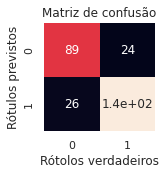

In [ ]:
predição(modelo=models['Arvore'],dados=x_teste,dados1=y_teste)  

Analisando o modelo de treino com arvore de decisão


 Acurácia: 86.92%



Classificação: 
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       297
           1       0.87      0.89      0.88       345

    accuracy                           0.87       642
   macro avg       0.87      0.87      0.87       642
weighted avg       0.87      0.87      0.87       642



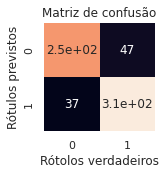

In [ ]:
predição(modelo=models['Arvore'],dados=x_treino,dados1=y_treino)  

Analisando a validação cruzada arvore de decisão

In [ ]:
validacao_cruzada(modelo=models['Arvore'],base=previsores1_esc)

Acurácia Média: 83.00%


Analisando o modelo de teste Random Forest


 Acurácia: 81.88%

Classificação: 
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       113
           1       0.85      0.84      0.85       163

    accuracy                           0.82       276
   macro avg       0.81      0.81      0.81       276
weighted avg       0.82      0.82      0.82       276



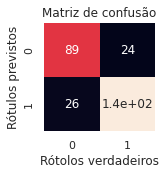

In [ ]:
predição(modelo=models['Arvore'],dados=x_teste,dados1=y_teste) 

Analisando o modelo de treino Random Forest


 Acurácia: 88.01%

Classificação: 
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       297
           1       0.87      0.91      0.89       345

    accuracy                           0.88       642
   macro avg       0.88      0.88      0.88       642
weighted avg       0.88      0.88      0.88       642



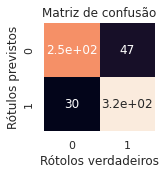

In [ ]:
predição(modelo=models['random'],dados=x_treino,dados1=y_treino) 

Analisando validação cruzada Random Forest

In [ ]:
validacao_cruzada(modelo=models['random'],base=previsores1_esc)

Acurácia Média: 85.41%


Analisando modelo de teste xgboost


 Acurácia: 84.06%

Classificação: 
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       113
           1       0.86      0.88      0.87       163

    accuracy                           0.84       276
   macro avg       0.84      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



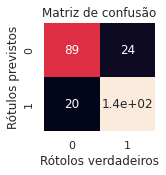

In [ ]:
predição(modelo=models['xgboost'],dados=x_teste,dados1=y_teste) 

Analisando modelo de treino xgboost


 Acurácia: 91.59%

Classificação: 
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       297
           1       0.91      0.93      0.92       345

    accuracy                           0.92       642
   macro avg       0.92      0.91      0.92       642
weighted avg       0.92      0.92      0.92       642



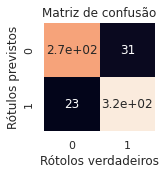

In [ ]:
predição(modelo=models['xgboost'],dados=x_treino,dados1=y_treino) 

Analisando validação cruzada xgboost

In [ ]:
validacao_cruzada(modelo=models['xgboost'],base=previsores1_esc)

Acurácia Média: 87.02%


Analisando o modelo ligthgbm

In [ ]:
dataset = lgb.Dataset(x_treino,label=y_treino)
parametros = {'num_leaves':200, # numero de folha
              'objective': 'binary', # classificação Binaria
              'max_depth': 2,
              'learning_rate': .05,
              'max_bin': 200}
lgbm = lgb.train(parametros,dataset,num_boost_round=150)
  
def ligth (mod,dd1,dd):
    previ_lgbm = np.round(mod.predict(dd1))
    
    print('\n Acurácia: %.2f%%'%(accuracy_score(dd,previ_lgbm)*100))
    sns.set(font_scale=1.0)
    plt.subplots(figsize=(2,2))
    plt.title('Matriz de confusão')
    ax = sns.heatmap(confusion_matrix(dd,previ_lgbm),annot=True,cbar=False)
    plt.xlabel('Rótolos verdadeiros')
    plt.ylabel('Rótulos previstos')
    print(f'\nClassificação: \n{classification_report(dd,previ_lgbm)}')


[LightGBM] [Info] Number of positive: 345, number of negative: 297
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 352
[LightGBM] [Info] Number of data points in the train set: 642, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.537383 -> initscore=0.149812
[LightGBM] [Info] Start training from score 0.149812
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Analisando o modelo de teste ligthgbm


 Acurácia: 84.42%

Classificação: 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       113
           1       0.86      0.88      0.87       163

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



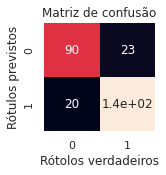

In [ ]:
ligth(mod=lgbm,dd1=x_teste,dd=y_teste)

Analisando o modelo de treino ligthgbm


 Acurácia: 90.97%



Classificação: 
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       297
           1       0.90      0.93      0.92       345

    accuracy                           0.91       642
   macro avg       0.91      0.91      0.91       642
weighted avg       0.91      0.91      0.91       642



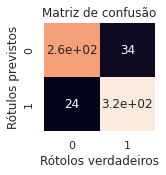

In [ ]:
ligth(mod=lgbm,dd1=x_treino,dd=y_treino)

Analisando validação cruzada

In [ ]:
kf = KFold(n_splits=30,shuffle=True,random_state=5)
modelo = lgb.LGBMClassifier(num_leaves = 200,
              objective = 'binary',
              max_depth = 2,
              learning_rate= .05,
              max_bin= 200)
re = cross_val_score(modelo,previsores,alvo,cv=kf)

[LightGBM] [Info] Number of positive: 490, number of negative: 397
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 434
[LightGBM] [Info] Number of data points in the train set: 887, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.552424 -> initscore=0.210469
[LightGBM] [Info] Start training from score 0.210469
[LightGBM] [Info] Number of positive: 490, number of negative: 397
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 438
[LightGBM] [Info] Number of data points in the train set: 887, number of used features: 11
[LightGBM] [Info] [binary:BoostFro

In [ ]:
print("Acurácia Média: %.2f%%"%(re.mean()*100.0))

Acurácia Média: 86.80%


modelo Catboost

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1


In [ ]:
previsores2 = df.iloc[:,0:11]
previsores2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up


In [ ]:
alvo2 = df.iloc[:,11]
alvo2

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [ ]:
x_treino,x_teste, y_treino,y_teste =train_test_split(previsores2,alvo2,test_size=0.25,random_state=0)

In [ ]:
categorias = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

In [ ]:
catboost = CatBoostClassifier(task_type='CPU',iterations=120,learning_rate=0.5,depth=1,random_state=3,eval_metric='Accuracy')

In [ ]:
catboost.fit(x_teste,y_teste,cat_features=categorias,plot=True, eval_set=(x_teste,y_teste))
previsoes_cat = catboost.predict(x_teste)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7043478	test: 0.7043478	best: 0.7043478 (0)	total: 55.8ms	remaining: 6.64s
1:	learn: 0.7869565	test: 0.7826087	best: 0.7826087 (1)	total: 59.7ms	remaining: 3.52s
2:	learn: 0.7869565	test: 0.7826087	best: 0.7826087 (1)	total: 60.1ms	remaining: 2.35s
3:	learn: 0.7826087	test: 0.7826087	best: 0.7826087 (1)	total: 60.5ms	remaining: 1.75s
4:	learn: 0.7956522	test: 0.7913043	best: 0.7913043 (4)	total: 60.8ms	remaining: 1.4s
5:	learn: 0.8217391	test: 0.8173913	best: 0.8173913 (5)	total: 61.1ms	remaining: 1.16s
6:	learn: 0.8173913	test: 0.8173913	best: 0.8173913 (5)	total: 63.2ms	remaining: 1.02s
7:	learn: 0.8260870	test: 0.8217391	best: 0.8217391 (7)	total: 64.8ms	remaining: 907ms
8:	learn: 0.8347826	test: 0.8347826	best: 0.8347826 (8)	total: 65.7ms	remaining: 810ms
9:	learn: 0.8304348	test: 0.8260870	best: 0.8347826 (8)	total: 71.1ms	remaining: 782ms
10:	learn: 0.8347826	test: 0.8391304	best: 0.8391304 (10)	total: 71.7ms	remaining: 711ms
11:	learn: 0.8347826	test: 0.8391304	best:

In [ ]:
print("Acurácia Média: %.2f%%"%(accuracy_score(y_teste,previsoes_cat)*100.0))
print(f'\n Classificação: \n{classification_report(y_teste,previsoes_cat)}')
print(f'\n Matriz:\n{confusion_matrix(y_teste,previsoes_cat)}')


Acurácia Média: 86.52%

 Classificação: 
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        92
           1       0.86      0.93      0.89       138

    accuracy                           0.87       230
   macro avg       0.87      0.85      0.86       230
weighted avg       0.87      0.87      0.86       230


 Matriz:
[[ 71  21]
 [ 10 128]]


In [ ]:
previsoes_cat_treino = catboost.predict(x_treino)

In [ ]:
print("Acurácia Média: %.2f%%"%(accuracy_score(y_treino,previsoes_cat_treino)*100.0))
print(f'\n Classificação: \n{classification_report(y_treino,previsoes_cat_treino)}')
print(f'\n Matriz:\n{confusion_matrix(y_treino,previsoes_cat_treino)}')

Acurácia Média: 86.34%

 Classificação: 
              precision    recall  f1-score   support

           0       0.90      0.80      0.84       318
           1       0.84      0.92      0.88       370

    accuracy                           0.86       688
   macro avg       0.87      0.86      0.86       688
weighted avg       0.87      0.86      0.86       688


 Matriz:
[[253  65]
 [ 29 341]]


In [ ]:
paciente1 = np.array([40, 0, 1, 140, 289, 0, 0, 172, 0, 0, 0])

paciente1 = paciente1.reshape(1, -1)

paciente2 = np.array([48,1,3,138,214,0,0,108,1,1.5,1])

paciente2 = paciente2.reshape(1, -1)

alvo1 = alvo.to_numpy()


In [ ]:
reg =  LogisticRegression(random_state=1, max_iter=600,penalty='l2',tol=0.0001,C=1,solver='lbfgs')

reg.fit(previsores,alvo1)

Re = reg.predict(paciente1)

if Re == 1:
    print('O paciente possui tendência de problemas cardíacos')
else:
    print('O paciente não possui tendência problemas cardíacos')    

O paciente não possui tendência problemas cardíacos
